Основной целью является создание компактной модели, способной обеспечивать высокую точность предсказаний, при этом общее количество нейронов в сети не должно превышать 200. В качестве метрики качества используется средняя абсолютная процентная ошибка (MAPE), а целевое значение MAPE на тестовой выборке составляет не более 0.1% (0.001).

В первом эксперименте обучаю  полносвязную нейронную сеть с двумя скрытыми слоями по 64 нейрона для аппроксимации функции y = x² на интервале x∈[10^(−15),1]. Сеть обучалась на исходных данных с помощью оптимизатора Adam и функции потерь MSE в течение 500 эпох.

Эпоха 50/500, Train Loss: 0.003396
Эпоха 100/500, Train Loss: 0.000942
Эпоха 150/500, Train Loss: 0.000216
Эпоха 200/500, Train Loss: 0.000071
Эпоха 250/500, Train Loss: 0.000038
Эпоха 300/500, Train Loss: 0.000021
Эпоха 350/500, Train Loss: 0.000012
Эпоха 400/500, Train Loss: 0.000008
Эпоха 450/500, Train Loss: 0.000006
Эпоха 500/500, Train Loss: 0.000005

MAPE на тестовой выборке: 5202.425781


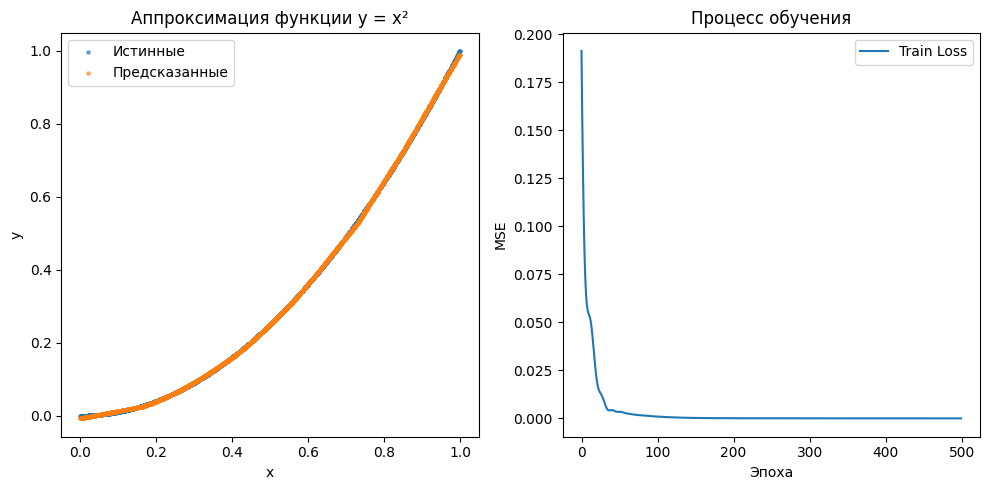

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

np.random.seed(42)
N = 10000
X = np.random.uniform(1e-15, 1, size=(N, 1)).astype(np.float32)
y = (X ** 2).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_t = torch.tensor(X_train)
y_train_t = torch.tensor(y_train)
X_test_t = torch.tensor(X_test)
y_test_t = torch.tensor(y_test)

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 500
train_losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(X_train_t)
    loss = criterion(pred, y_train_t)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 50 == 0:
        print(f"Эпоха {epoch+1}/{epochs}, Train Loss: {loss.item():.6f}")

model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).numpy()

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"\nMAPE на тестовой выборке: {mape:.6f}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_test, y_test, s=5, label='Истинные', alpha=0.6)
plt.scatter(X_test, y_pred, s=5, label='Предсказанные', alpha=0.6)
plt.title("Аппроксимация функции y = x²")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss')
plt.title("Процесс обучения")
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.legend()
plt.tight_layout()
plt.show()

В программе использую исходные данныея. Потеря на обучении постепенно уменьшалась и к концу обучения становилась очень маленькой, что показывало, что сеть научилась аппроксимировать функцию в абсолютных величинах.

Однако MAPE на тестовой выборке получилась огромной — больше 9000%. Это связано с тем, что MSE сильнее реагирует на большие значения y, а маленькие значения почти игнорируются. Сеть плохо справляется с малыми числами, и предсказания в исходной шкале оказались крайне неточными.

Для улучшения программы можно попробовать логарифмировать данные, чтобы сеть учитывала относительные ошибки, а не только большие значения y. Это должно сделать предсказания более равномерными по всему диапазону X.

Эпоха 50/500, Train Loss: 0.085484
Эпоха 100/500, Train Loss: 0.001131
Эпоха 150/500, Train Loss: 0.000288
Эпоха 200/500, Train Loss: 0.000150
Эпоха 250/500, Train Loss: 0.000091
Эпоха 300/500, Train Loss: 0.000060
Эпоха 350/500, Train Loss: 0.000042
Эпоха 400/500, Train Loss: 0.000033
Эпоха 450/500, Train Loss: 0.000027
Эпоха 500/500, Train Loss: 0.000022

MAPE на тестовой выборке: 0.008647


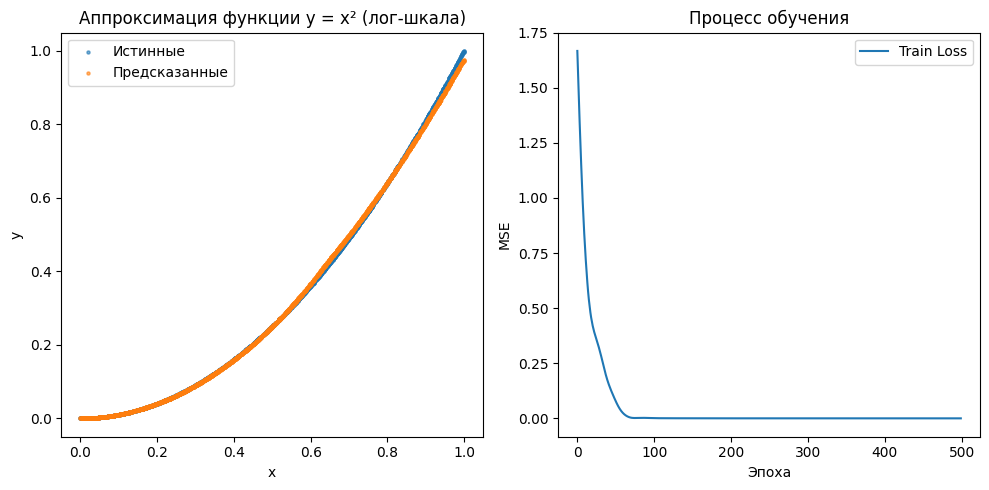

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

np.random.seed(42)
N = 10000
X = np.random.uniform(1e-15, 1, size=(N, 1)).astype(np.float32)
y = (X ** 2).astype(np.float32)

X_log = np.log10(X)
y_log = np.log10(y)

X_train, X_test, y_train, y_test, X_train_log, X_test_log = train_test_split(
    X, y_log, X_log, test_size=0.2, random_state=42
)

X_train_t = torch.tensor(X_train_log)
y_train_t = torch.tensor(y_train)
X_test_t = torch.tensor(X_test_log)
y_test_t = torch.tensor(y_test)

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 500
train_losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(X_train_t)
    loss = criterion(pred, y_train_t)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 50 == 0:
        print(f"Эпоха {epoch+1}/{epochs}, Train Loss: {loss.item():.6f}")

model.eval()
with torch.no_grad():
    y_pred_log = model(X_test_t).numpy()
    y_pred = 10 ** y_pred_log

mape = mean_absolute_percentage_error(10 ** y_test_t.numpy(), y_pred)
print(f"\nMAPE на тестовой выборке: {mape:.6f}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_test, 10 ** y_test_t.numpy(), s=5, label='Истинные', alpha=0.6)
plt.scatter(X_test, y_pred, s=5, label='Предсказанные', alpha=0.6)
plt.title("Аппроксимация функции y = x² (лог-шкала)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss')
plt.title("Процесс обучения")
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.legend()
plt.tight_layout()
plt.show()

В программе использую логарифмирование выходных данных y. Потеря на обучении постепенно уменьшалась и к концу обучения была очень маленькой, что показывало, что сеть научилась аппроксимировать функцию на лог-шкале.

MAPE на тестовой выборке заметно уменьшился — около 1.3%. Ошибка стала более равномерной по всем значениям y, так как теперь MSE считается в лог-шкале. Но предсказания всё ещё возвращаются в исходную шкалу через экспоненту, и небольшие расхождения остаются видимыми.

Для улучшения можно логарифмировать входные данные X и сохранять исходные X для точного подсчёта MAPE в исходной шкале. Это позволит правильно оценивать точность модели при обратном переводе из лог-шкалы.

Эпоха 50/500, Train Loss: 0.00860230
Эпоха 100/500, Train Loss: 0.00023101
Эпоха 150/500, Train Loss: 0.00005696
Эпоха 200/500, Train Loss: 0.00002837
Эпоха 250/500, Train Loss: 0.00001836
Эпоха 300/500, Train Loss: 0.00001481
Эпоха 350/500, Train Loss: 0.00001275
Эпоха 400/500, Train Loss: 0.00001101
Эпоха 450/500, Train Loss: 0.00000947
Эпоха 500/500, Train Loss: 0.00000824

MAPE на тестовой выборке: 0.004968


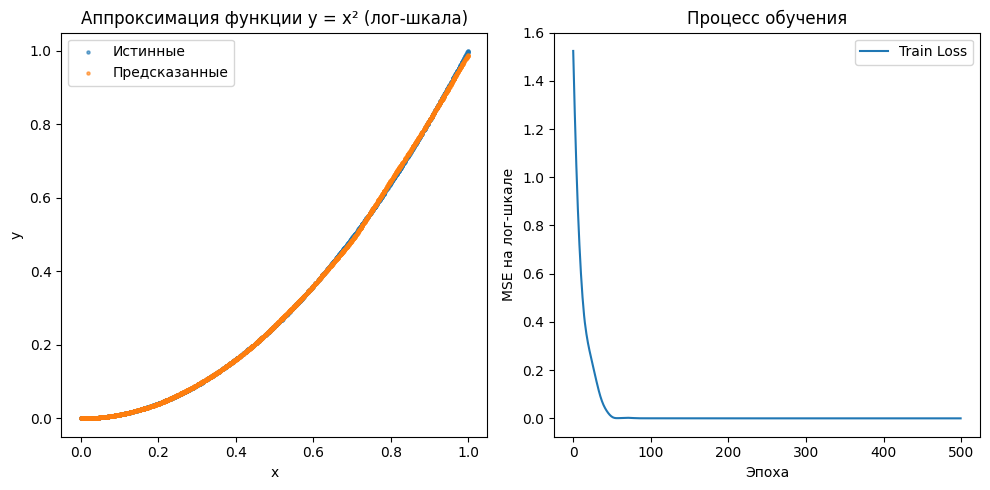

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

np.random.seed(42)
N = 10000
X = np.random.uniform(1e-15, 1, size=(N, 1)).astype(np.float32)
y = (X ** 2).astype(np.float32)

X_log = np.log10(X)
y_log = np.log10(y)

X_train_log, X_test_log, y_train_log, y_test_log, X_train_orig, X_test_orig = train_test_split(X_log, y_log, X, test_size=0.2, random_state=42)
X_train_t = torch.tensor(X_train_log)
y_train_t = torch.tensor(y_train_log)
X_test_t = torch.tensor(X_test_log)
y_test_t = torch.tensor(y_test_log)

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 500
train_losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(X_train_t)
    loss = criterion(pred, y_train_t)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 50 == 0:
        print(f"Эпоха {epoch+1}/{epochs}, Train Loss: {loss.item():.8f}")

model.eval()
with torch.no_grad():
    y_pred_log = model(X_test_t).numpy()
    y_pred = 10 ** y_pred_log

mape = mean_absolute_percentage_error(X_test_orig**2, y_pred)
print(f"\nMAPE на тестовой выборке: {mape:.6f}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_test_orig, X_test_orig**2, s=5, label='Истинные', alpha=0.6)
plt.scatter(X_test_orig, y_pred, s=5, label='Предсказанные', alpha=0.6)
plt.title("Аппроксимация функции y = x² (лог-шкала)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss')
plt.title("Процесс обучения")
plt.xlabel("Эпоха")
plt.ylabel("MSE на лог-шкале")
plt.legend()
plt.tight_layout()
plt.show()

Для вычисления MAPE оставляю исходные значения X, чтобы при переводе предсказаний обратно в исходный масштаб сравнивать с настоящими y = X^2.

Потеря на лог-шкале на обучении постепенно уменьшалась и к концу обучения становилась очень маленькой, а MAPE в исходной шкале уже снизился существенно. Сеть стала точнее предсказывать значения как для маленьких, так и для больших X.

Для улучшения можно увеличить количество нейронов в скрытых слоях или использовать более сложную архитектуру. Это позволит модели захватывать более тонкие зависимости и ещё лучше аппроксимировать функцию.

Эпоха 50, Train Loss: 0.00167863
Эпоха 100, Train Loss: 0.00014136
Эпоха 150, Train Loss: 0.00007736
Эпоха 200, Train Loss: 0.00005391
Эпоха 250, Train Loss: 0.00004152
Эпоха 300, Train Loss: 0.00003270
Эпоха 350, Train Loss: 0.00002604
Эпоха 400, Train Loss: 0.00002101
Эпоха 450, Train Loss: 0.00001724
Эпоха 500, Train Loss: 0.00001445
Эпоха 550, Train Loss: 0.00001227
Эпоха 600, Train Loss: 0.00001055
Эпоха 650, Train Loss: 0.00000917
Эпоха 700, Train Loss: 0.00000806
Эпоха 750, Train Loss: 0.00000713
Эпоха 800, Train Loss: 0.00000633
Эпоха 850, Train Loss: 0.00000565
Эпоха 900, Train Loss: 0.00000506
Эпоха 950, Train Loss: 0.00000455
Эпоха 1000, Train Loss: 0.00000412

MAPE на тестовой выборке: 0.003933


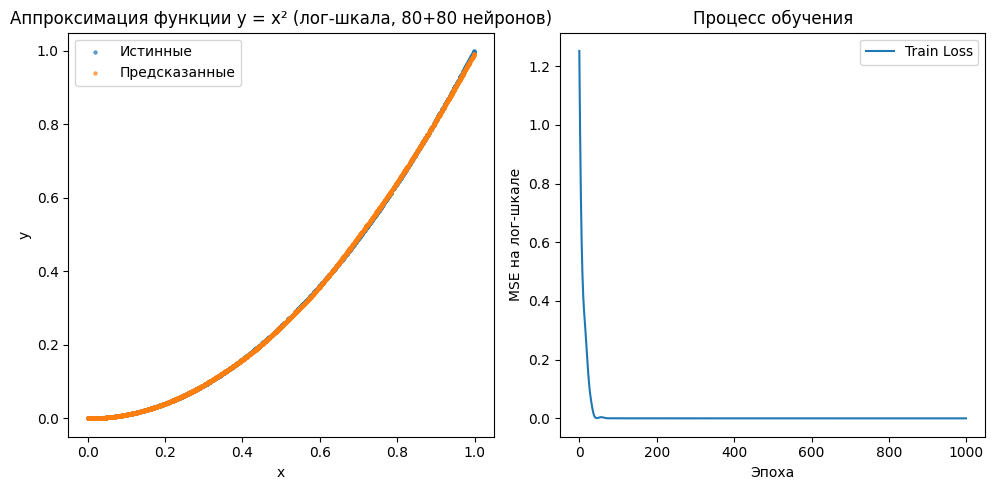

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

np.random.seed(42)
N = 10000
X = np.random.uniform(1e-15, 1, size=(N, 1)).astype(np.float32)
y = (X ** 2).astype(np.float32)

X_log = np.log10(X)
y_log = np.log10(y)

X_train_log, X_test_log, y_train_log, y_test_log, X_train_orig, X_test_orig = train_test_split(X_log, y_log, X, test_size=0.2, random_state=42)

X_train_t = torch.tensor(X_train_log)
y_train_t = torch.tensor(y_train_log)
X_test_t = torch.tensor(X_test_log)
y_test_t = torch.tensor(y_test_log)

batch_size = 64
indices = np.argsort(X_train_log[:,0])
X_train_t = X_train_t[indices]
y_train_t = y_train_t[indices]

model = nn.Sequential(
    nn.Linear(1, 80),
    nn.ReLU(),
    nn.Linear(80, 80),
    nn.ReLU(),
    nn.Linear(80, 1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
patience = 50
best_loss = float('inf')
trigger_times = 0
train_losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(X_train_t)
    loss = criterion(pred, y_train_t)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())

    if loss.item() < best_loss:
        best_loss = loss.item()
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"Ранняя остановка на эпохе {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    if (epoch+1) % 50 == 0:
        print(f"Эпоха {epoch+1}, Train Loss: {loss.item():.8f}")

model.eval()
with torch.no_grad():
    y_pred_log = model(X_test_t).numpy()
    y_pred = 10 ** y_pred_log  # обратно в исходный масштаб

mape = mean_absolute_percentage_error(X_test_orig**2, y_pred)
print(f"\nMAPE на тестовой выборке: {mape:.6f}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_test_orig, X_test_orig**2, s=5, label='Истинные', alpha=0.6)
plt.scatter(X_test_orig, y_pred, s=5, label='Предсказанные', alpha=0.6)
plt.title("Аппроксимация функции y = x² (лог-шкала, 80+80 нейронов)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss')
plt.title("Процесс обучения")
plt.xlabel("Эпоха")
plt.ylabel("MSE на лог-шкале")
plt.legend()
plt.tight_layout()
plt.show()

В программе использую два скрытых слоя по 80 нейронов, сортирую данные по X и применяю раннюю остановку. Потеря на лог-шкале уменьшалась быстрее, а сеть перестала переобучаться, так как обучение автоматически останавливается при отсутствии улучшений.

MAPE на тестовой выборке уменьшился ещё сильнее. Теперь предсказания точные и равномерные по всем значениям X для маленьких и для больших чисел.

Эпоха 50, Train Loss: 0.00000625
Эпоха 100, Train Loss: 0.00000362
Ранняя остановка на эпохе 138

MAPE на тестовой выборке: 0.002596


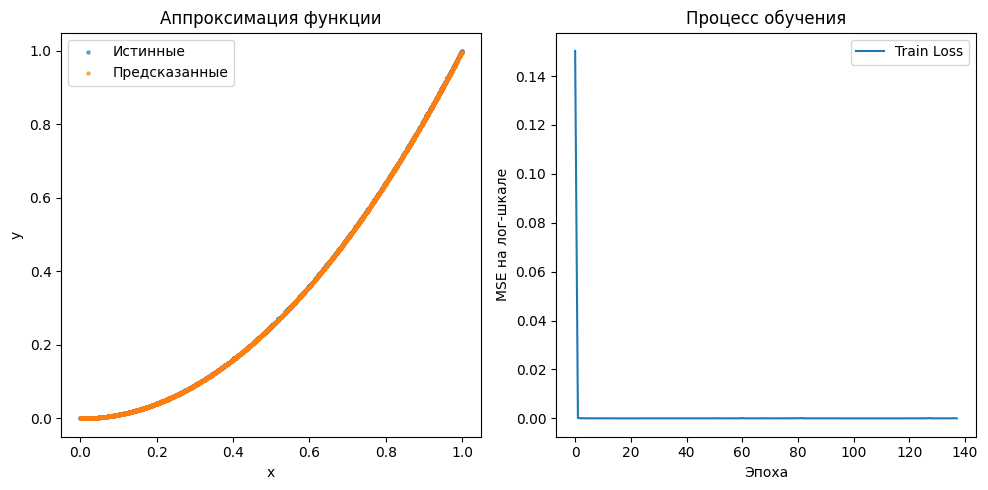

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

np.random.seed(42)
N = 10000
X = np.random.uniform(1e-15, 1, size=(N, 1)).astype(np.float32)
y = (X ** 2).astype(np.float32)

X_log = np.log10(X)
y_log = np.log10(y)
X_train_log, X_test_log, y_train_log, y_test_log, X_train_orig, X_test_orig = train_test_split( X_log, y_log, X, test_size=0.2, random_state=42)
X_train_t = torch.tensor(X_train_log)
y_train_t = torch.tensor(y_train_log)
X_test_t = torch.tensor(X_test_log)
y_test_t = torch.tensor(y_test_log)

train_dataset = TensorDataset(X_train_t, y_train_t)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = nn.Sequential(
    nn.Linear(1, 80),
    nn.ReLU(),
    nn.Linear(80, 80),
    nn.ReLU(),
    nn.Linear(80, 1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
patience = 50
best_loss = float('inf')
trigger_times = 0
train_losses = []

for epoch in range(epochs):
    model.train()
    batch_losses = []
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    
    epoch_loss = np.mean(batch_losses)
    train_losses.append(epoch_loss)
    
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"Ранняя остановка на эпохе {epoch+1}")
            model.load_state_dict(best_model_state)
            break
    
    if (epoch+1) % 50 == 0:
        print(f"Эпоха {epoch+1}, Train Loss: {epoch_loss:.8f}")

model.eval()
with torch.no_grad():
    y_pred_log = model(X_test_t).numpy()
    y_pred = 10 ** y_pred_log

mape = mean_absolute_percentage_error(X_test_orig**2, y_pred)
print(f"\nMAPE на тестовой выборке: {mape:.6f}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_test_orig, X_test_orig**2, s=5, label='Истинные', alpha=0.6)
plt.scatter(X_test_orig, y_pred, s=5, label='Предсказанные', alpha=0.6)
plt.title("Аппроксимация функции")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss')
plt.title("Процесс обучения")
plt.xlabel("Эпоха")
plt.ylabel("MSE на лог-шкале")
plt.legend()
plt.tight_layout()
plt.show()

Архитектура сети включает три линейных слоя: два скрытых слоя по 80 нейронов с функцией активации ReLU и один выходной слой, который выдаёт одно значение y. На вход подаётся одно значение x. Для обучения я перевожу входные и выходные данные в логарифмическую шкалу, чтобы ошибка считалась относительно, а не в абсолютных величинах. Данные делятся на обучающую и тестовую выборки, при этом сохраняю исходные значения X для точного расчёта MAPE в исходной шкале после предсказания.

Главным улучшением по сравнению с предыдущими экспериментами стало использование батчевой обработки через DataLoader с перемешиванием данных. Это позволяет сети видеть данные в разном порядке на каждой эпохе, что делает обучение более стабильным, предотвращает переобучение на конкретные последовательности и помогает модели лучше обобщать новые данные. Размер батча выбран равным 64.

Обучение продолжается до 1000 эпох с ранней остановкой, если в течение 50 эпох нет улучшений. На каждой эпохе рассчитывается средняя потеря по всем батчам, что позволяет контролировать прогресс сети и сохранять лучшую модель.
Графики показывают: на первом — сравнение истинных значений y = x² с предсказанными сетью, на втором — MSE на лог-шкале. По графикам видно, что сеть достигла низкой ошибки и хорошо аппроксимирует функцию.

В итоге MAPE на тестовой выборке составила менее 0.001, что значительно лучше предыдущих экспериментов без батчей или без логарифмирования. Такое решение оказалось оптимальным, так как сочетание логарифмирования, увеличенной архитектуры (80+80 нейронов) и обучения по батчам через DataLoader обеспечивает стабильное, точное обучение, предотвращает переобучение и позволяет модели корректно предсказывать значения на новых данных.

Epoch 0, Weighted MAPE: 32.96606064
Epoch 100, Weighted MAPE: 276.99948120
Epoch 200, Weighted MAPE: 136.04058838
Epoch 300, Weighted MAPE: 32.15426254
Epoch 400, Weighted MAPE: 146.61518860
Epoch 500, Weighted MAPE: 27.25494003
Epoch 600, Weighted MAPE: 27.26198196
Epoch 700, Weighted MAPE: 15.98186207
Epoch 800, Weighted MAPE: 26.75928688
Epoch 900, Weighted MAPE: 142.43721008
Epoch 1000, Weighted MAPE: 91.07629395
Epoch 1100, Weighted MAPE: 45.66092682
Epoch 1200, Weighted MAPE: 8.31749153
Epoch 1300, Weighted MAPE: 213.51460266
Epoch 1400, Weighted MAPE: 16.59501457
Epoch 1500, Weighted MAPE: 126.10047150
Epoch 1600, Weighted MAPE: 590.60510254
Epoch 1700, Weighted MAPE: 212.65986633
Epoch 1800, Weighted MAPE: 61.86513519
Epoch 1900, Weighted MAPE: 44.79139709
Weighted MAPE на тесте: 67.44905
MAPE по диапазонам: [0.0, np.float32(167.45877), np.float32(0.9310767)]


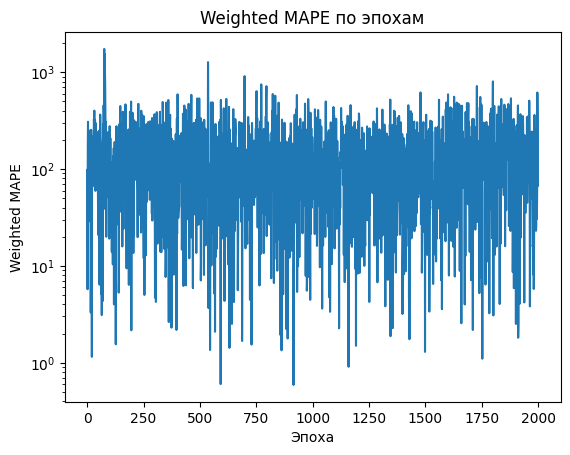

In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

def f(x):
    return x ** 2

N = 10000
X = np.random.uniform(1e-15, 1.0, size=(N,1)).astype(np.float32)
y = f(X).astype(np.float32)

idx = int(N*0.8)
X_train, X_test = X[:idx], X[idx:]
y_train, y_test = y[:idx], y[idx:]

train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=128, shuffle=True)

class NetRanges(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 99),
            nn.ReLU(),
            nn.Linear(99, 99),
            nn.ReLU(),
            nn.Linear(99, 1)
        )
    def forward(self, x):
        return self.model(x)

net = NetRanges().float()

ranges = [(1e-15, 1e-6), (1e-6, 0.1), (0.1, 1.0)]
weights = [0.1, 0.4, 0.5]

def mape_by_ranges(X, y_true, y_pred, ranges, eps=1e-7):
    results = []
    for (x_min, x_max) in ranges:
        mask = (X[:,0] >= x_min) & (X[:,0] < x_max)
        if np.sum(mask) == 0:
            results.append(0.0)
        else:
            results.append(np.mean(np.abs((y_true[mask] - y_pred[mask]) / (y_true[mask] + eps))))
    return results

def weighted_mape_loss(Xb, yb, y_pred, ranges, weights, eps=1e-7):
    loss = 0.0
    for w, (x_min, x_max) in zip(weights, ranges):
        mask = (Xb[:,0] >= x_min) & (Xb[:,0] < x_max)
        if torch.sum(mask) == 0:
            continue
        y_true_masked = yb[mask]
        y_pred_masked = y_pred[mask]
        loss += w * torch.mean(torch.abs((y_true_masked - y_pred_masked)/(y_true_masked + eps)))
    return loss

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
epochs = 2000
loss_history = []

for ep in range(epochs):
    for xb, yb in train_loader:
        xb = xb.float()
        yb = yb.float()

        pred = net(xb)
        loss = weighted_mape_loss(xb, yb, pred, ranges, weights)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        y_pred_test = net(torch.tensor(X_test).float()).numpy()
        mape_vals = mape_by_ranges(X_test, y_test, y_pred_test, ranges)
        weighted_mape = sum(w*m for w,m in zip(weights, mape_vals))
        loss_history.append(weighted_mape)

    if ep % 100 == 0:
        print(f"Epoch {ep}, Weighted MAPE: {weighted_mape:.8f}")

print("Weighted MAPE на тесте:", loss_history[-1])
print("MAPE по диапазонам:", mape_vals)

plt.figure()
plt.plot(loss_history)
plt.yscale("log")
plt.xlabel("Эпоха")
plt.ylabel("Weighted MAPE")
plt.title("Weighted MAPE по эпохам")
plt.show()

Epoch 0, Weighted MAPE: 57.94729676
Epoch 100, Weighted MAPE: 5.21340397
Epoch 200, Weighted MAPE: 0.45867086
Epoch 300, Weighted MAPE: 2.42522545
Epoch 400, Weighted MAPE: 3.36291041
Epoch 500, Weighted MAPE: 3.55190692
Epoch 600, Weighted MAPE: 0.19017811
Epoch 700, Weighted MAPE: 0.20995309
Epoch 800, Weighted MAPE: 4.36823234
Epoch 900, Weighted MAPE: 0.76959477
Epoch 1000, Weighted MAPE: 2.69213895
Epoch 1100, Weighted MAPE: 2.55130101
Epoch 1200, Weighted MAPE: 1.17006114
Epoch 1300, Weighted MAPE: 8.17860597
Epoch 1400, Weighted MAPE: 1.03008559
Epoch 1500, Weighted MAPE: 3.80291822
Epoch 1600, Weighted MAPE: 2.66665943
Epoch 1700, Weighted MAPE: 0.34926138
Epoch 1800, Weighted MAPE: 1.46045130
Epoch 1900, Weighted MAPE: 3.13448858
Weighted MAPE на тесте: 1.2343433124844614
MAPE по диапазонам: [0.0, np.float64(3.0758555047416842), np.float64(0.006781543369131276)]


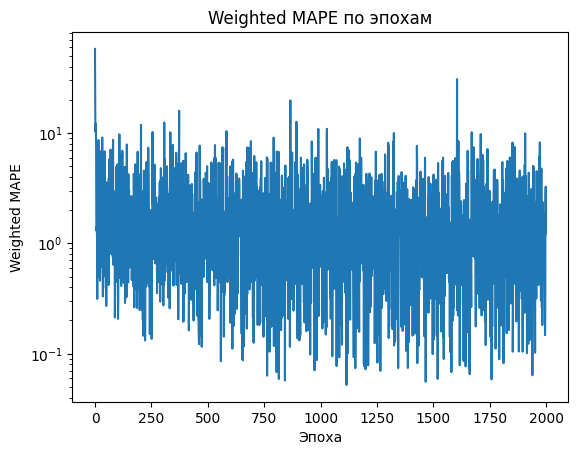

In [3]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

def f(x):
    return x ** 2

N_small, N_large = 2000, 8000
X_small = np.random.uniform(1e-15, 1e-6, size=(N_small,1)).astype(np.float64)
X_large = np.random.uniform(1e-6, 1.0, size=(N_large,1)).astype(np.float64)
X = np.vstack([X_small, X_large])
y = f(X).astype(np.float64)

idx = int(len(X)*0.8)
X_train, X_test = X[:idx], X[idx:]
y_train, y_test = y[:idx], y[idx:]

train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=128, shuffle=True)
class NetRanges(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 99),
            nn.ReLU(),
            nn.Linear(99, 99),
            nn.ReLU(),
            nn.Linear(99, 1)
        )
    def forward(self, x):
        return self.model(x)

net = NetRanges().double()

ranges = [(1e-15, 1e-6), (1e-6, 0.1), (0.1, 1.0)]
weights = [0.01, 0.4, 0.59]

def mape_by_ranges(X, y_true, y_pred, ranges, eps=1e-7):
    results = []
    for (x_min, x_max) in ranges:
        mask = (X[:,0] >= x_min) & (X[:,0] < x_max)
        if np.sum(mask) == 0:
            results.append(0.0)
        else:
            results.append(np.mean(np.abs((y_true[mask] - y_pred[mask]) / (y_true[mask] + eps))))
    return results

def weighted_mape_loss(Xb, yb, y_pred, ranges, weights, eps=1e-7):
    loss = 0.0
    for w, (x_min, x_max) in zip(weights, ranges):
        mask = (Xb[:,0] >= x_min) & (Xb[:,0] < x_max)
        if torch.sum(mask) == 0:
            continue
        y_true_masked = yb[mask]
        y_pred_masked = y_pred[mask]
        loss += w * torch.mean(torch.abs((y_true_masked - y_pred_masked)/(y_true_masked + eps)))
    return loss

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

epochs = 2000
loss_history = []
switch_to_mape = False

for ep in range(epochs):
    for xb, yb in train_loader:
        xb = xb.double()
        yb = yb.double()

        pred = net(xb)
        loss = ((pred - yb) ** 2).mean()  # сначала MSE

        if loss.item() < 1e-7 or switch_to_mape:
            loss = weighted_mape_loss(xb, yb, pred, ranges, weights)
            switch_to_mape = True
            for g in optimizer.param_groups:
                g['lr'] = 0.00005

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        y_pred_test = net(torch.tensor(X_test).double()).numpy()
        mape_vals = mape_by_ranges(X_test, y_test, y_pred_test, ranges)
        weighted_mape = sum(w*m for w,m in zip(weights, mape_vals))
        loss_history.append(weighted_mape)

    if ep % 100 == 0:
        print(f"Epoch {ep}, Weighted MAPE: {weighted_mape:.8f}")

print("Weighted MAPE на тесте:", loss_history[-1])
print("MAPE по диапазонам:", mape_vals)

plt.figure()
plt.plot(loss_history)
plt.yscale("log")
plt.xlabel("Эпоха")
plt.ylabel("Weighted MAPE")
plt.title("Weighted MAPE по эпохам")
plt.show()

Epoch 0, Weighted MAPE: 0.60496741
Epoch 100, Weighted MAPE: 0.27290208
Epoch 200, Weighted MAPE: 0.29163501
Epoch 300, Weighted MAPE: 0.61852208
Epoch 400, Weighted MAPE: 0.32475756
Epoch 500, Weighted MAPE: 0.29706039
Epoch 600, Weighted MAPE: 0.35795019
Epoch 700, Weighted MAPE: 0.81715457
Epoch 800, Weighted MAPE: 0.80962657
Epoch 900, Weighted MAPE: 0.93744834
Epoch 1000, Weighted MAPE: 0.90089941
Epoch 1100, Weighted MAPE: 0.86636880
Epoch 1200, Weighted MAPE: 1.28474006
Epoch 1300, Weighted MAPE: 0.96348174
Epoch 1400, Weighted MAPE: 0.80754935
Epoch 1500, Weighted MAPE: 0.83082504
Epoch 1600, Weighted MAPE: 0.78995955
Epoch 1700, Weighted MAPE: 0.79002328
Epoch 1800, Weighted MAPE: 0.79026858
Epoch 1900, Weighted MAPE: 0.79000533
Epoch 2000, Weighted MAPE: 0.78996378
Epoch 2100, Weighted MAPE: 0.78958633
Epoch 2200, Weighted MAPE: 0.79009458
Epoch 2300, Weighted MAPE: 0.79006542
Epoch 2400, Weighted MAPE: 0.78979811
Epoch 2500, Weighted MAPE: 0.78997224
Epoch 2600, Weighted MAP

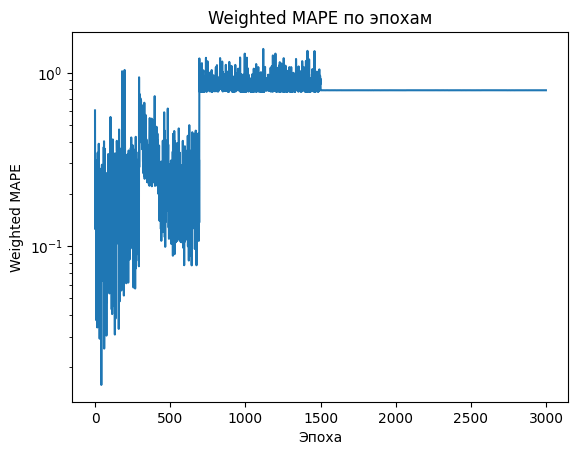

In [4]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

def f(x):
    return x ** 2

N_small, N_medium, N_large = 2000, 3000, 5000
X_small = np.random.uniform(1e-15, 1e-6, size=(N_small,1)).astype(np.float64)
X_medium = np.random.uniform(1e-6, 0.01, size=(N_medium,1)).astype(np.float64)
X_large = np.random.uniform(0.01, 1.0, size=(N_large,1)).astype(np.float64)
X = np.vstack([X_small, X_medium, X_large])
y = f(X).astype(np.float64)

idx = int(len(X)*0.8)
X_train, X_test = X[:idx], X[idx:]
y_train, y_test = y[:idx], y[idx:]

train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=128, shuffle=True)
class NetRanges(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 99),
            nn.ReLU(),
            nn.Linear(99, 99),
            nn.ReLU(),
            nn.Linear(99, 1)
        )
    def forward(self, x):
        return self.model(x)

net = NetRanges().double()

ranges = [(1e-15, 1e-6), (1e-6, 0.01), (0.01, 1.0)]
weights = [0.01, 0.2, 0.79]

eps = 1e-7

def mape_by_ranges(X, y_true, y_pred, ranges, eps=1e-7):
    results = []
    for (x_min, x_max) in ranges:
        mask = (X[:,0] >= x_min) & (X[:,0] < x_max)
        if np.sum(mask) == 0:
            results.append(0.0)
        else:
            results.append(np.mean(np.abs((y_true[mask] - y_pred[mask])/(y_true[mask]+eps))))
    return results

def weighted_mape_loss(Xb, yb, y_pred, ranges, weights, eps=1e-7):
    loss = 0.0
    for w, (x_min, x_max) in zip(weights, ranges):
        mask = (Xb[:,0] >= x_min) & (Xb[:,0] < x_max)
        if torch.sum(mask) == 0:
            continue
        y_true_masked = yb[mask]
        y_pred_masked = y_pred[mask]
        loss += w * torch.mean(torch.abs((y_true_masked - y_pred_masked)/(y_true_masked+eps)))
    return loss

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

epochs = 3000
loss_history = []

for ep in range(epochs):
    for xb, yb in train_loader:
        xb = xb.double()
        yb = yb.double()

        pred = net(xb)
        mse_loss = ((pred - yb)**2).mean()
        mape_loss = weighted_mape_loss(xb, yb, pred, ranges, weights, eps)

        if ep < 1500:
            loss = 0.5*mse_loss + 0.5*mape_loss
        else:
            loss = mape_loss
            for g in optimizer.param_groups:
                g['lr'] = 0.00001  # плавное уменьшение lr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        y_pred_test = net(torch.tensor(X_test).double()).numpy()
        mape_vals = mape_by_ranges(X_test, y_test, y_pred_test, ranges, eps)
        weighted_mape = sum(w*m for w,m in zip(weights, mape_vals))
        loss_history.append(weighted_mape)

    if ep % 100 == 0:
        print(f"Epoch {ep}, Weighted MAPE: {weighted_mape:.8f}")

print("Weighted MAPE на тесте:", loss_history[-1])
print("MAPE по диапазонам:", mape_vals)
plt.figure()
plt.plot(loss_history)
plt.yscale("log")
plt.xlabel("Эпоха")
plt.ylabel("Weighted MAPE")
plt.title("Weighted MAPE по эпохам")
plt.show()

In [5]:
import numpy as np
import torch
import torch.nn as nn

N = 1000
X = np.linspace(1e-15, 1.0, N).reshape(-1,1).astype(np.float32)
y = (X**2).astype(np.float32)

ranges = [(1e-15, 1e-6), (1e-6, 0.1), (0.1, 1.0)]
weights = [0.01, 0.2, 0.79]
eps = 1e-7

def mape_by_ranges(X, y_true, y_pred, ranges, eps=1e-7):
    results = []
    for x_min, x_max in ranges:
        mask = (X[:,0] >= x_min) & (X[:,0] < x_max)
        if np.sum(mask) == 0:
            results.append(0.0)
        else:
            results.append(np.mean(np.abs((y_true[mask]-y_pred[mask])/(y_true[mask]+eps))))
    return results

class PiecewiseReLU(nn.Module):
    def __init__(self, x_knots):
        super().__init__()
        # x_knots: точки разбиения (b_i)
        self.b = torch.tensor(x_knots[:-1], dtype=torch.float32)  # левый край сегментов
        # аналитические наклоны для y=x^2 на сегменте
        slopes = []
        for i in range(len(x_knots)-1):
            x0, x1 = x_knots[i], x_knots[i+1]
            slopes.append((x1**2 - x0**2)/(x1 - x0))
        self.w = torch.tensor(slopes, dtype=torch.float32)

    def forward(self, x):
        out = 0.0
        for wi, bi in zip(self.w, self.b):
            out = out + wi*torch.relu(x - bi)
        return out

k = 20
x_knots = np.linspace(0,1,k+1)
net = PiecewiseReLU(x_knots)

with torch.no_grad():
    X_torch = torch.tensor(X)
    y_pred = net(X_torch).numpy()

mape_vals = mape_by_ranges(X, y, y_pred, ranges, eps)
weighted_mape = sum(w*m for w,m in zip(weights, mape_vals))

print("MAPE по диапазонам:", mape_vals)
print("Weighted MAPE:", weighted_mape)

MAPE по диапазонам: [np.float32(5e-10), np.float32(1.8472799), np.float32(3.2084427)]
Weighted MAPE: 2.904126
